# Student Activity: Financial Forecasting

In this activity, Harold's manager wants Harold to take a look at one year's worth of `TSLA` stock prices and plot a potential stock trajectory for where `TSLA` stock prices could go in the next `3` years. In addition, he would like to know how a $10,000 investment would perform given the simulated results.

Help Harold by creating a Monte Carlo simulation that simulates the next `252 * 3` trading days using three years worth of `TSLA` stock data. Plot the simulated results of `TSLA` daily returns over the next `3` years as well as the corresponding simulated outcomes.

In [1]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get 3 Years Worth of Data via API Call and Read in as DataFrame 

In [3]:
# Set the ticker
ticker = "TSLA"

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2018-08-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-04", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA

ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=10000
).df

In [4]:
# Reorganize the DataFrame
ticker_data = pd.concat([ticker_data], axis=1, keys=["TSLA"])

# Display sample data
ticker_data.head()

TSLA                                      \
                             open    high       low   close    volume   
timestamp                                                               
2018-08-06 04:00:00+00:00  345.00  354.98  341.8200  341.99   8564349   
2018-08-07 04:00:00+00:00  343.84  387.46  339.1501  379.57  30876809   
2018-08-08 04:00:00+00:00  368.84  382.64  367.1200  370.34  24608013   
2018-08-09 04:00:00+00:00  365.55  367.01  345.7300  352.45  17183938   
2018-08-10 04:00:00+00:00  353.78  360.00  346.0000  355.49  11556348   

                                                   
                          trade_count        vwap  
timestamp                                          
2018-08-06 04:00:00+00:00       94745  348.791044  
2018-08-07 04:00:00+00:00      332458  364.240162  
2018-08-08 04:00:00+00:00      278774  374.104677  
2018-08-09 04:00:00+00:00      195136  355.494616  
2018-08-10 04:00:00+00:00      119931  353.663867

### Run the Monte Carlo Simulation

In [5]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns

MC_TSLA = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252
)

In [6]:
# Run Monte Carlo simulations to forecast three years daily returns

MC_TSLA.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


C:\Users\Johnathan Overton\Desktop\Fintech\UofM-VIRT-FIN-PT-06-2022-U-LOLC\Learning-APIs\API_Practice\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.986176  1.023008  0.980495  0.904315  0.961924  1.035396  1.043787   
2    1.019997  1.034505  1.005848  0.888144  0.943057  1.058447  1.009452   
3    1.041480  1.018125  1.075344  0.891116  0.860567  0.984797  0.979173   
4    1.060118  1.007976  1.074679  0.926492  0.853492  1.009256  0.865669   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.735645  1.917999  1.596073  1.867288  2.024599  1.308774  1.848472   
249  1.646817  2.086798  1.646745  1.801550  1.999238  1.206752  1.759558   
250  1.650248  1.903763  1.589199  1.996766  1.964198  1.205468  1.884307   
251  1.575350  1.915933  1.661316  1.984632  1.993019  1.219812  1.860740   
252  1.551022  1.874223  1.793208  2.035357  2.094205  1.110887  1.830194   

          7         8         9    ...       990       991       992  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.986568  0.989084  0.936318  ...  0.952659  0.912471  0.918789   
2    0.957054  0.880357  0.925436  ...  0.852766  0.951089  0.930379   
3    0.957494  0.885893  1.015517  ...  0.909278  0.950469  0.860337   
4    0.990988  0.896373  1.110268  ...  0.906750  0.931845  0.872651   
..        ...       ...       ...  ...       ...       ...       ...   
248  3.688597  0.369423  4.610711  ...  1.760161  1.774039  0.827753   
249  3.425011  0.375231  4.773964  ...  1.718133  1.841589  0.883973   
250  3.615078  0.413057  4.560245  ...  1.702336  1.918036  0.868343   
251  3.638950  0.428849  4.649908  ...  1.854900  1.887002  0.856478   
252  3.623490  0.407525  4.912900  ...  1.746678  1.981301  0.845081   

          993       994       995       996       997       998       999  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.025910  1.032971  0.926179  0.972118  0.987070  0.987055  1.010250  
2    0.964011  0.998079  0.904391  0.921845  0.994417  1.038298  0.950704  
3    0.961207  0.983488  0.896507  0.922050  1.052885  1.026603  0.994218  
4    0.928596  0.982418  0.924780  0.862887  1.030236  1.083287  1.033420  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.411685  0.432712  0.898182  3.065343  0.077458  2.599156  0.999965  
249  1.431275  0.435865  0.903964  3.030252  0.073851  2.463819  1.047906  
250  1.482109  0.448209  0.946036  3.014625  0.073213  2.591670  1.085639  
251  1.433909  0.451256  0.920055  3.187570  0.077432  2.635756  1.079072  
252  1.431349  0.456157  0.829730  3.135136  0.080903  2.659683  1.078694  

[253 rows x 1000 columns]

### With these results, create a DataFrame which holds the mean, median, minimum, and maximum simulated performance.

In [7]:
# Compute summary statistics from the simulated daily returns

simulated_returns_data = {
    "mean": list(MC_TSLA.simulated_return.mean(axis=1)),
    "median": list(MC_TSLA.simulated_return.median(axis=1)),
    "min": list(MC_TSLA.simulated_return.min(axis=1)),
    "max": list(MC_TSLA.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics

df_simulated_returns = pd.DataFrame(simulated_returns_data)


# Display sample data

df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.003040  1.001882  0.860328  1.201531
2  1.007368  1.006276  0.798278  1.284123
3  1.008331  1.005722  0.742115  1.301755
4  1.011511  1.007928  0.697069  1.370421

### Plot the Simulated Cumulative Return Trajectory for `TSLA` over the Next Three Years (252*3 Trading Days)

#### Use just the `mean` and `median` forecasts.

<AxesSubplot:title={'center':'Tesla Mean & Median Cum. Returns Over 3 Yrs'}>

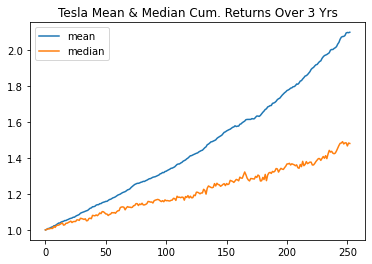

In [8]:
# Use the `plot` function to visually analyze TSLA cumulative returns over the next three hears
# (Plot both mean and median forecasted cumulative return)

df_simulated_returns[['mean','median']].plot(title="Tesla Mean & Median Cum. Returns Over 3 Yrs")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next Three Years

In [9]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money

cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

mean        median           min           max
0  10000.000000  10000.000000  10000.000000  10000.000000
1  10030.396783  10018.815229   8603.282231  12015.308599
2  10073.680263  10062.758918   7982.781361  12841.225984
3  10083.312176  10057.222355   7421.153888  13017.554962
4  10115.112556  10079.275024   6970.692499  13704.206787

### Plot the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next `252` Trading Days

<AxesSubplot:title={'center':'Simulated Outcomes Behavior of TSLA Stock Over the Next Year'}>

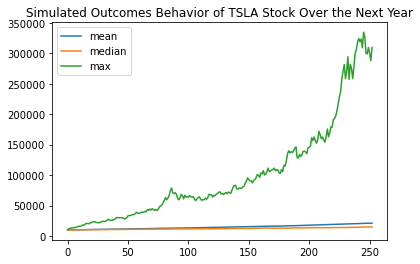

In [10]:
# Use the 'plot' function to create a chart of the simulated profits/losses

cumulative_pnl[['mean','median','max']].plot(title="Simulated Outcomes Behavior of TSLA Stock Over the Next Year")

### Calculate the range of the possible outcomes of our $10,000 investments in `TSLA` stocks

In [11]:
# Fetch summary statistics from the Monte Carlo simulation results
# Hint: Use the `summarize_cumulative_return` function
tbl = MC_TSLA.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               2.100598
std                2.105353
min                0.080903
25%                0.858436
50%                1.481381
75%                2.632578
max               30.950734
95% CI Lower       0.284157
95% CI Upper       7.317089
Name: 252, dtype: float64


In [12]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks

ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $2841.57 and $73170.89.
